In [128]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

Drug vaccination between age 13-100 years
people>65 age   observed some side effects(denoted as 1)
people<65 age   no side effects(denoted as 0)

In [129]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [130]:
train_sample=[]
train_label=[]
for i in range(1000):
    younger_ages=randint(13,64)
    train_sample.append(younger_ages)
    train_label.append(0)
    
    older_ages=randint(65,100)
    train_sample.append(older_ages)
    train_label.append(1)

In [131]:
train_sample

[16,
 86,
 25,
 71,
 50,
 84,
 57,
 65,
 51,
 93,
 34,
 78,
 25,
 93,
 49,
 66,
 56,
 99,
 30,
 81,
 56,
 69,
 64,
 77,
 37,
 74,
 26,
 90,
 48,
 82,
 29,
 79,
 25,
 90,
 54,
 90,
 55,
 73,
 40,
 92,
 56,
 86,
 61,
 91,
 56,
 91,
 18,
 82,
 21,
 75,
 45,
 77,
 42,
 86,
 46,
 92,
 27,
 97,
 26,
 68,
 16,
 70,
 13,
 70,
 39,
 93,
 32,
 89,
 46,
 93,
 57,
 96,
 51,
 73,
 57,
 67,
 48,
 70,
 36,
 78,
 18,
 71,
 14,
 91,
 14,
 83,
 45,
 69,
 22,
 75,
 61,
 97,
 60,
 96,
 30,
 76,
 43,
 72,
 60,
 73,
 53,
 96,
 19,
 79,
 17,
 68,
 13,
 98,
 52,
 100,
 40,
 85,
 29,
 98,
 14,
 80,
 13,
 100,
 20,
 81,
 58,
 93,
 18,
 83,
 52,
 73,
 27,
 91,
 33,
 81,
 14,
 67,
 38,
 77,
 61,
 85,
 37,
 80,
 48,
 72,
 24,
 73,
 63,
 85,
 33,
 72,
 17,
 84,
 35,
 73,
 34,
 84,
 49,
 93,
 27,
 95,
 50,
 100,
 64,
 98,
 22,
 92,
 59,
 90,
 35,
 74,
 23,
 96,
 23,
 67,
 41,
 71,
 19,
 84,
 21,
 98,
 33,
 90,
 15,
 74,
 47,
 73,
 44,
 76,
 51,
 67,
 42,
 73,
 18,
 78,
 43,
 67,
 15,
 71,
 52,
 72,
 13,
 75,
 42,
 9

In [132]:
train_label

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [133]:
#convert the values into numpy array
train_sample=np.array(train_sample)
train_sample

array([16, 86, 25, ..., 80, 21, 69])

In [134]:
train_label=np.array(train_label)
train_label

array([0, 1, 0, ..., 1, 0, 1])

In [135]:
#scalling the values in between 0 to 1
sc=MinMaxScaler(feature_range=(0,1)) #here we are using feature_range the values we have to convert particular range
sc_train_sample=sc.fit_transform(train_sample.reshape(-1,1))
sc_train_sample

array([[0.03448276],
       [0.83908046],
       [0.13793103],
       ...,
       [0.77011494],
       [0.09195402],
       [0.64367816]])

In [136]:
model=Sequential()

#Adding the 1st hidden layer and input layer
model.add(Dense(units = 10, kernel_initializer = 'he_normal', activation='relu', input_dim = 1))

#Adding the 2nd hidden layer
model.add(Dense(units = 20, kernel_initializer = 'he_normal', activation='relu'))

#Adding the 3rd hidden layer
model.add(Dense(units = 15, kernel_initializer = 'he_normal', activation='relu'))


In [137]:
#Adding the output layer
model.add(Dense(units = 2, kernel_initializer = 'glorot_uniform', activation = 'softmax'))

In [138]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_32 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_33 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 32        
Total params: 587
Trainable params: 587
Non-trainable params: 0
_________________________________________________________________


In [139]:
#Compiling the ANN
model.compile(Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [140]:
model_his = model.fit(train_sample,train_label, validation_split = 0.25, batch_size=10, nb_epoch=20)

Train on 1500 samples, validate on 500 samples
Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8457 - accuracy: 0.5460 - val_loss: 0.5574 - val_accuracy: 0.6220
Epoch 2/20
1500/1500 [==============================] - 1s 356us/step - loss: 0.5868 - accuracy: 0.6920 - val_loss: 0.5302 - val_accuracy: 0.6560
Epoch 3/20
1500/1500 [==============================] - 0s 317us/step - loss: 0.5727 - accuracy: 0.7467 - val_loss: 0.4177 - val_accuracy: 0.7840
Epoch 4/20
1500/1500 [==============================] - 1s 361us/step - loss: 0.4393 - accuracy: 0.8153 - val_loss: 0.3953 - val_accuracy: 0.9900
Epoch 5/20
1500/1500 [==============================] - 0s 331us/step - loss: 0.4189 - accuracy: 0.8187 - val_loss: 0.3413 - val_accuracy: 0.9880
Epoch 6/20
1500/1500 [==============================] - 0s 328us/step - loss: 0.3609 - accuracy: 0.8520 - val_loss: 0.3122 - val_accuracy: 0.9900
Epoch 7/20
1500/1500 [==============================] - 0s 317us/step - loss: 0

In [141]:
print(model_his.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [142]:
model_his.history['loss']

[0.8457405358552933,
 0.5867882981896401,
 0.5726995317141215,
 0.43931909412145614,
 0.41888759563366573,
 0.3608636592825254,
 0.32287717759609225,
 0.30386657203237216,
 0.31430461034178736,
 0.2840747244656086,
 0.2941648887097836,
 0.2889847741027673,
 0.22621093099315961,
 0.23904878980169694,
 0.23578914458552996,
 0.27344427987933156,
 0.22941906739026308,
 0.17960716169327498,
 0.2005329040872554,
 0.2160637094080448]

In [143]:
model_his.history['val_loss']

[0.5574137669801712,
 0.5301924908161163,
 0.4177327364683151,
 0.39531202137470245,
 0.34129971385002134,
 0.312204994559288,
 0.32974153369665143,
 0.43589926302433013,
 0.2699362289905548,
 0.3808461543917656,
 0.21070892348885537,
 0.26776329074054955,
 0.2094135920703411,
 0.3322336146235466,
 0.17361495196819304,
 0.16813696913421153,
 0.1950864689052105,
 0.21472889348864554,
 0.3145278376527131,
 0.18586902037262917]

In [144]:
model_his.history['accuracy']

[0.546,
 0.692,
 0.74666667,
 0.8153333,
 0.81866664,
 0.852,
 0.89266664,
 0.89266664,
 0.876,
 0.8846667,
 0.88666666,
 0.88,
 0.92866665,
 0.9086667,
 0.906,
 0.884,
 0.90133333,
 0.94266665,
 0.9266667,
 0.90533334]

In [145]:
model_his.history['val_accuracy']

[0.621999979019165,
 0.656000018119812,
 0.7839999794960022,
 0.9900000095367432,
 0.9879999756813049,
 0.9900000095367432,
 0.8259999752044678,
 0.7599999904632568,
 0.9639999866485596,
 0.8040000200271606,
 0.9879999756813049,
 0.8479999899864197,
 0.9800000190734863,
 0.8339999914169312,
 0.9900000095367432,
 0.9319999814033508,
 0.9480000138282776,
 0.921999990940094,
 0.8360000252723694,
 0.9340000152587891]

In [155]:
import matplotlib.pyplot as plt

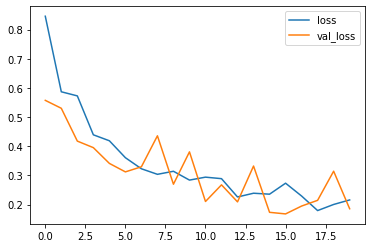

In [156]:
#plot the loss values
plt.plot(model_his.history['loss'], label='loss')
plt.plot(model_his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

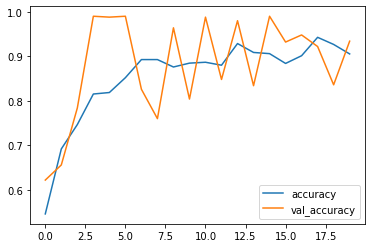

In [157]:
#plot the accuracy values
plt.plot(model_his.history['accuracy'], label='accuracy')
plt.plot(model_his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [146]:
test_sample=[]
test_label=[]
for i in range(1000):
    younger_ages=randint(13,64)
    test_sample.append(younger_ages)
    test_label.append(0)
    
    older_ages=randint(65,100)
    test_sample.append(older_ages)
    test_label.append(1)

In [147]:
test_sample=np.array(test_sample)
test_label=np.array(test_label)

In [148]:
test_sample

array([40, 67, 33, ..., 77, 51, 77])

In [149]:
test_label

array([0, 1, 0, ..., 1, 0, 1])

In [150]:
test_pred=model.predict_classes(test_sample,batch_size=10)
test_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [151]:
import pandas as pd
compare=pd.DataFrame({'Actual':test_label, 'predicted':test_pred})
compare

,Actual,predicted
0,0,0
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
1995,1,1
1996,0,0
1997,1,1
1998,0,0


In [152]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_label,test_pred))

[[1000    0]
 [ 158  842]]


in this model our predictions are-- correct predictions:1686, wrong predictions:314

In [153]:
from sklearn.metrics import classification_report
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1000
           1       1.00      0.84      0.91      1000

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [154]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_label,test_pred))

0.921
